In [42]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [43]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Load Libraries

In [44]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [45]:
# Code to load the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Read data from h5py file and understand train and test splits

In [46]:
import h5py

#Open the file as readonly

h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5','r')

h5f.keys()


<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [47]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:] 

# close h5f file

h5f.close()

print('Train Data set',X_train.shape,y_train.shape)
print('Test Data set',X_test.shape,y_test.shape)
print('SVHN Dataset has images of length 32 and width 32')



Train Data set (42000, 32, 32) (42000,)
Test Data set (18000, 32, 32) (18000,)
SVHN Dataset has images of length 32 and width 32


Label: 7


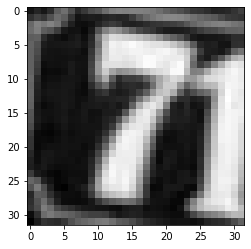

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[5000]))
plt.imshow(X_train[5000], cmap='gray')

## Reshape and normalize the train and test features

In [49]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Reshaped Train/Test data')
print('Train Data set',X_train.shape,y_train.shape)
print('Test Data set',X_test.shape,y_test.shape)

Reshaped Train/Test data
Train Data set (42000, 1024) (42000,)
Test Data set (18000, 1024) (18000,)




### Normalize features
- Normalize features from 0-255 to 0-1

In [50]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.max())
print(X_train.min())


0.9999
0.0


## One hot encoding labels for train and test data
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [51]:
# converting y data into categorical (one-hot encoding)

print("Value before encoding:", y_train[0])

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Value before encoding: 2
Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


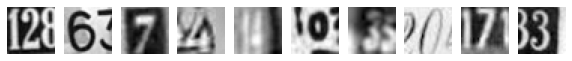

In [52]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


## Define the model architecuture using Tensorflow with flatten layer followed by dense layers with activation as Relu and softmax


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten

In [54]:
model = Sequential()


In [55]:
model.add(Flatten(input_shape = (1024, )))
model.add(Activation('relu'))    
model.add(Dense(256))
model.add(Activation('relu'))    
model.add(Dense(256))
model.add(Activation('relu'))      
model.add(Dense(10))
model.add(Activation('softmax'))

## Compile the model with loss as categorical cross entropy and adam optimizers.Use accuracy as the metric for evaluation.

In [56]:
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


## Fit and evaluate the model.Print the loss and accuracy for test data.

In [57]:

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size = 1000)

Epoch 1/200
42/42 [==============================] - 0s 8ms/step - loss: 2.2983 - accuracy: 0.1358 - val_loss: 2.2479 - val_accuracy: 0.2178
Epoch 2/200
42/42 [==============================] - 0s 6ms/step - loss: 2.1328 - accuracy: 0.2846 - val_loss: 1.9612 - val_accuracy: 0.3869
Epoch 3/200
42/42 [==============================] - 0s 6ms/step - loss: 1.7838 - accuracy: 0.4353 - val_loss: 1.6001 - val_accuracy: 0.5121
Epoch 4/200
42/42 [==============================] - 0s 6ms/step - loss: 1.5122 - accuracy: 0.5296 - val_loss: 1.4220 - val_accuracy: 0.5536
Epoch 5/200
42/42 [==============================] - 0s 6ms/step - loss: 1.3481 - accuracy: 0.5907 - val_loss: 1.3092 - val_accuracy: 0.5987
Epoch 6/200
42/42 [==============================] - 0s 6ms/step - loss: 1.2418 - accuracy: 0.6245 - val_loss: 1.2133 - val_accuracy: 0.6323
Epoch 7/200
42/42 [==============================] - 0s 6ms/step - loss: 1.1663 - accuracy: 0.6494 - val_loss: 1.1461 - val_accuracy: 0.6539
Epoch 8/200
4

In [58]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.6252 - accuracy: 0.8463
